##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [ ]:
#%pip install pandas 
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [2]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catB_train.parquet" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

# Import Packages

In [4]:
import numpy as np
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Data Loading

In [5]:
def load_model(filepath):
    df = pd.read_parquet(filepath)
    df.head()
    return df
df = load_model(filepath)

# Data Processing

In [6]:
# Removal of low variance variables
low_var_col = [c for c in df.columns if len(df[c].unique())==1]
print(low_var_col)

df = df.drop(columns=low_var_col)

['ape_gi_42e115', 'ape_ltc_1280bf', 'ape_inv_dcd836', 'ape_lh_d0adeb', 'ape_gi_a10d1b', 'ape_gi_29d435', 'ape_gi_856320', 'ape_gi_058815', 'ape_32c74c', 'sumins_gi_42e115', 'sumins_ltc_1280bf', 'sumins_inv_dcd836', 'sumins_lh_d0adeb', 'sumins_grp_22decf', 'sumins_gi_a10d1b', 'sumins_gi_29d435', 'sumins_lh_e22a6a', 'sumins_grp_e04c3a', 'sumins_gi_856320', 'sumins_grp_94baec', 'sumins_gi_058815', 'sumins_32c74c', 'prempaid_gi_42e115', 'prempaid_ltc_1280bf', 'prempaid_inv_dcd836', 'prempaid_lh_d0adeb', 'prempaid_gi_a10d1b', 'prempaid_gi_29d435', 'prempaid_gi_856320', 'prempaid_gi_058815', 'prempaid_32c74c', 'ape_d0adeb', 'ape_gi', 'f_hold_d0adeb', 'f_hold_gi', 'sumins_e22a6a', 'sumins_d0adeb', 'sumins_gi', 'prempaid_d0adeb', 'prempaid_gi', 'f_ever_bought_d0adeb', 'n_months_last_bought_d0adeb', 'f_ever_bought_ltc_1280bf', 'f_ever_bought_inv_dcd836', 'f_ever_bought_lh_d0adeb', 'f_ever_bought_32c74c', 'n_months_last_bought_ltc_1280bf', 'n_months_last_bought_inv_dcd836', 'n_months_last_bought

In [7]:
df = df.loc[df['cltdob_fix']!='None']
df = df.loc[df['min_occ_date']!='None']

In [8]:
# Datetime Manipulation
# Customer age
df['cltdob_fix'] = pd.to_datetime(df['cltdob_fix'])
df['cltage'] = 2024-df['cltdob_fix'].dt.year

# Duration (years) since customer first interacted
df['min_occ_date'] = pd.to_datetime(df['min_occ_date'])
df['cltyears'] = 2024-df['min_occ_date'].dt.year

df = df.drop(columns=['cltdob_fix','min_occ_date'])

In [9]:
df['cltyears'].describe()

count    17960.000000
mean         9.286136
std          7.112973
min          1.000000
25%          4.000000
50%          8.000000
75%         13.250000
max         70.000000
Name: cltyears, dtype: float64

In [10]:
df.head()

,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,...,recency_hlthclaim_unsuccess,flg_hlthclaim_839f8a_ever,recency_hlthclaim_839f8a,flg_hlthclaim_14cb37_ever,recency_hlthclaim_14cb37,giclaim_amt,recency_giclaim,f_purchase_lh,cltage,cltyears
19550,91b546e924,Chinese,Singapore,P,ACTIVE,Female,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,50,7
4600,896bae548c,Chinese,Singapore,P,ACTIVE,Male,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,45,17
13337,f364439ae6,Others,Singapore,P,ACTIVE,Male,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,48,5
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,Female,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,48,3
19724,2647a81328,Chinese,Singapore,P,ACTIVE,Female,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,29,6


In [11]:
# Convert target col to 0 or 1 (binary)
df["f_purchase_lh"] = df["f_purchase_lh"].fillna(0)

# Identifiy numeric columns and fill null values with the median value
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Encode non-numeric cols
non_numeric_cols = df.select_dtypes(include=["string","object"]).columns
label_encoder = LabelEncoder()
for c in non_numeric_cols:
    df[c] = label_encoder.fit_transform(df[c])



In [12]:
y = df["f_purchase_lh"]
X = df.drop(columns=['f_purchase_lh'])

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
print('Before SMOTE:', Counter(y_train))
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
print('After SMOTE:', Counter(y_train))

Before SMOTE: Counter({0.0: 13799, 1.0: 569})


c:\Users\USER\anaconda3\envs\eg3611\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\USER\anaconda3\envs\eg3611\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\USER\anaconda3\envs\eg3611\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


After SMOTE: Counter({0.0: 13799, 1.0: 13799})


In [14]:
dt_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=2)
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
mlp_clf = MLPClassifier()
svc_clf = SVC(C=1)

In [15]:
def train_model(model,X_train,y_train,X_val,y_val):
    model.fit(X_train, y_train)

    # Evaluate on validation set
    y_pred = model.predict(X_val)
    print(classification_report(y_val, y_pred))

    # Code to generate visualisation of matrix
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,) # set display_label according to dataset
    disp.plot()
    return

c:\Users\USER\anaconda3\envs\eg3611\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\USER\anaconda3\envs\eg3611\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\USER\anaconda3\envs\eg3611\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\USER\anaconda3\envs\eg3611\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      3453
         1.0       0.42      0.08      0.13       139

    accuracy                           0.96      3592
   macro avg       0.69      0.54      0.56      3592
weighted avg       0.94      0.96      0.95      3592



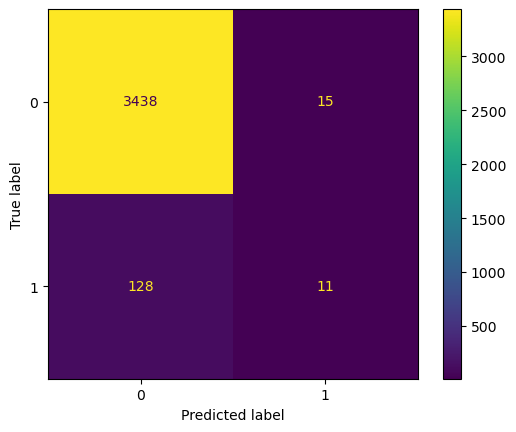

In [16]:
train_model(rf_clf,X_train,y_train,X_val,y_val)

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [17]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    df = hidden_data
    
    # Removal of low variance variables
    low_var_col = [c for c in df.columns if len(df[c].unique())==1]
    df = df.drop(columns=low_var_col)
    df = df.loc[df['cltdob_fix']!='None']
    df = df.loc[df['min_occ_date']!='None']

    # Datetime Manipulation
    # Customer age
    df['cltdob_fix'] = pd.to_datetime(df['cltdob_fix'])
    df['cltage'] = 2024-df['cltdob_fix'].dt.year

    # Duration (years) since customer first interacted
    df['min_occ_date'] = pd.to_datetime(df['min_occ_date'])
    df['cltyears'] = 2024-df['min_occ_date'].dt.year

    df = df.drop(columns=['cltdob_fix','min_occ_date'])
    
    # Identifiy numeric columns and fill null values with the median value
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
    df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

    # Encode non-numeric cols
    non_numeric_cols = df.select_dtypes(include=['string',"object"]).columns
    label_encoder = LabelEncoder()
    for c in non_numeric_cols:
        df[c] = label_encoder.fit_transform(df[c])
    
    result = rf_clf.predict(df).tolist()

    return result

##### Cell to check testing_hidden_data function

In [18]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

c:\Users\USER\anaconda3\envs\eg3611\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\USER\anaconda3\envs\eg3611\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\USER\anaconda3\envs\eg3611\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!